# Assignment 2: Regularization in Regression Models

Before you submit this assignment, please carefully read these submission instructions:

 - Make sure the notebook you submit is cleanly and **fully executed**. 
 - Submit your notebook back in Blackboard where you downloaded this file.
 - Submit your work as either a .ipynb Python file or a PDF file on Blackboard.
 - Please include your name in the filename.

**Goal: In this assignment, we will explore regularization techniques like Ridge, Lasso, and ElasticNet (optional) regression. The goal is to review regularization concepts through hands-on implementation of these models.**

#### Assignment Tasks

- Perform data exploration.
- Explore the data through visualizations
- Fit a baseline multiple linear regression model
- Fit Ridge regression with different alpha values
- Fit Lasso regression with different alpha values
- Analyze impact of alpha on model coefficients
- Evaluate and compare models using R-squared, RMSE
- Summarize key differences between the regularization techniques
- (Optional) Dive into elastic net and compare its performance.

#### Introduction to the Boston Housing Dataset:

For this assignment, we will be working with the Boston Housing dataset. This dataset provides an array of information related to housing prices in Boston and several predictor variables. It offers a real-world application, allowing us to explore how different factors might influence house prices. Here's a brief overview of the features:

- CRIM: Per capita crime rate by town.
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX: Nitric oxide concentration (parts per 10 million).
- RM: Average number of rooms per dwelling.
- AGE: Proportion of owner-occupied units built before 1940.
- DIS: Weighted distances to five Boston employment centers.
- RAD: Index of accessibility to radial highways.
- TAX: Full-value property tax rate per $10,000.
- PTRATIO: Pupil-teacher ratio by town.

- B: 1000(Bk - 0.63)^2 where Bk is the proportion of African Americans by town
- LSTAT: Percentage of the population considered lower status.
- **MEDV**: Median value of owner-occupied homes (in $1000s).


##### Accessing the Dataset:
The Boston Housing dataset is available for download on Blackboard. Navigate to the Assignment folder for Week 2 to access the dataset.

##### Going Beyond

You are encouraged to further your analysis and experiment with the data. Additional visualizations, insights, or even diving deeper into elastic net regression will enhance your understanding and showcase your analytical prowess.

<br>

## Task 1: Load Dataset and Examine Basic Information


In [1]:

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load Dataset 
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
# Examine Basic Information
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

**<font color=blue>Please answer the following questions to provide basic information about the Boston Housing Dataset</font>**
- How many features does the Boston Housing Dataset contain?
- What are the data types for each column?

In [7]:
num_features = df.shape[1] - 1  # assuming 'MEDV' is the target variable
print(f"Number of features (excluding target): {num_features}")


Number of features (excluding target): 13


In [11]:
# What are the data types for each column?
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


## Task 2: Exploratory Data Analysis (EDA): Data Visualization and Insights

##### 1. Basic Statistics:

Generate descriptive statistics

In [19]:
basic_stats = df.describe()
print(basic_stats)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

##### 2. Data Distribution:

   - Plot histograms or density plots for one or some key features and the target variable `MEDV` to understand their distribution.

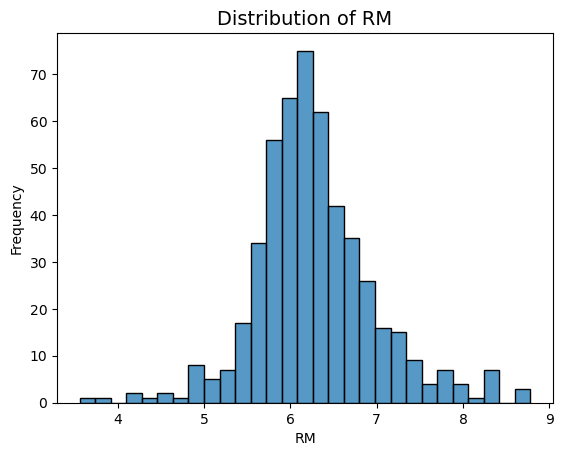

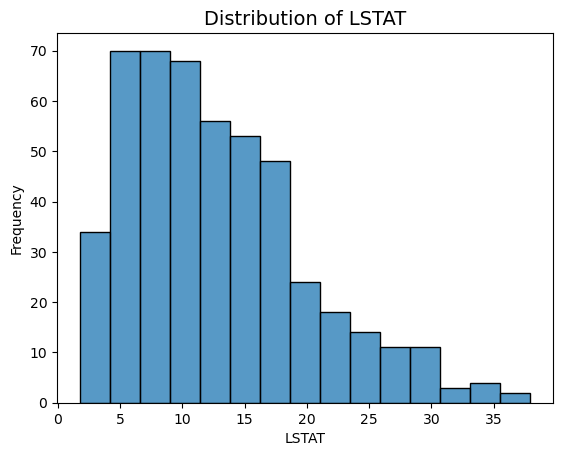

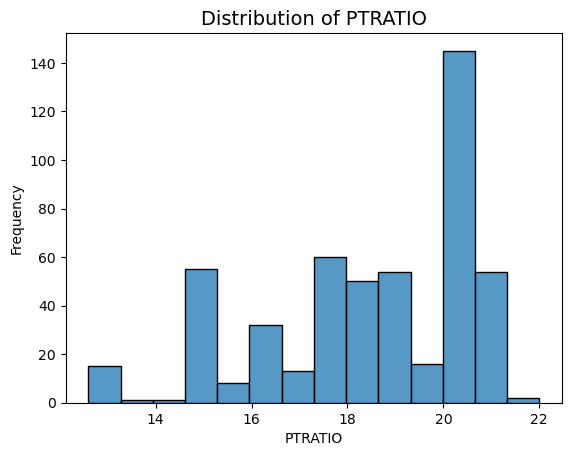

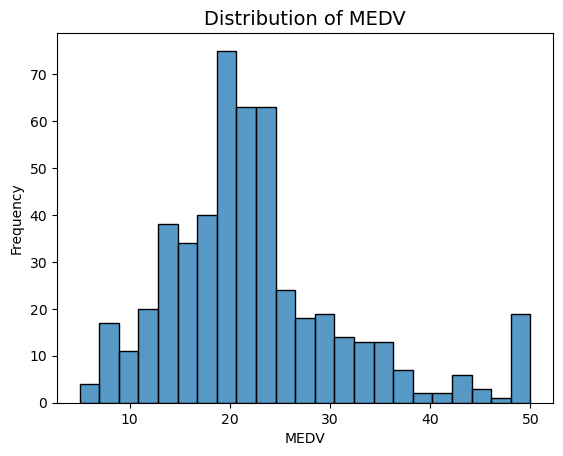

In [27]:
# Select a few key features and the target
key_columns = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']

# Create histograms with KDE overlaid
for col in key_columns:
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### 3. Correlation Analysis:

  - Compute the correlation matrix and visualize it using a heatmap to identify features that are most correlated with the target variable `MEDV`.

In [31]:
corr_matrix = df.corr()
# Display correlation values with respect to MEDV, sorted
medv_corr = corr_matrix['MEDV'].sort_values(ascending=False)
print("Correlation of features with MEDV:\n")
print(medv_corr)

Correlation of features with MEDV:

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


<Axes: >

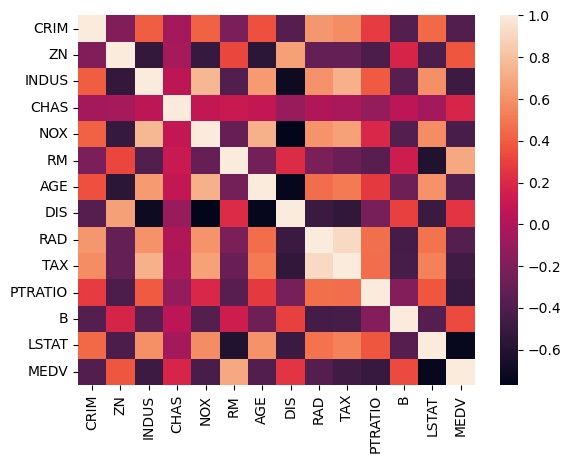

In [37]:
sns.heatmap(corr_matrix)
#RM is most correlated with the target variable MEDV

**Optional**: 4. Scatter Plots: 

- Create scatter plots for the features `RM` and `LSTAT` against `MEDV` to visualize their relationship.


*This is an optional task; completing it will allow you to observe the relationships among these variables, but you won't lose points for skipping it. Feel free to create any additional visualizations you'd like to further explore*

<Axes: xlabel='RM', ylabel='MEDV'>

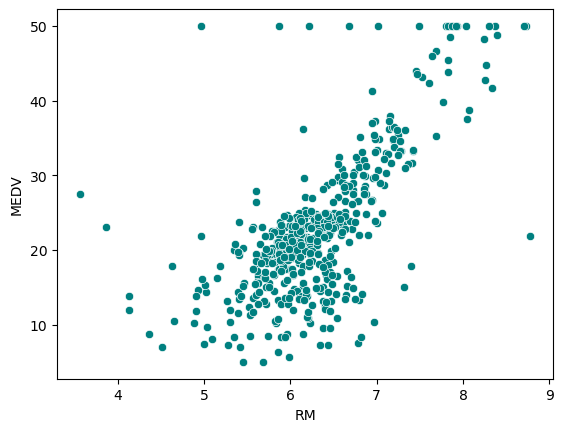

In [39]:
sns.scatterplot(x='RM', y='MEDV', data=df, color='teal')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

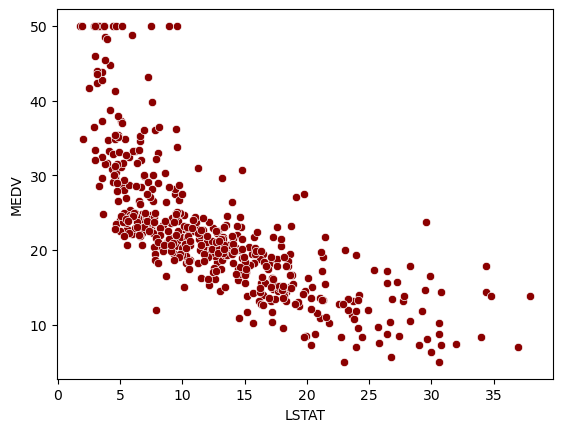

In [41]:
sns.scatterplot(x='LSTAT', y='MEDV', data=df, color='darkred')


### <font color=blue>Question</font>

**Write down your observations from the above visualizations: Which features seem to have a strong relationship with the target variable?**

In [ ]:
#RM and MEDV are positive coreelated but LSTAT and MEDV are more negative correlated

## Task 3: Data Preprocessing:

We only cover handling missing values in this assisgnment. We will skip the feature scaling step for now. Once we learn about feature scaling, we will include it in the data preprocessing step. It is important to include data preprocessing like handling missing values, encoding categorical variables, treating outliers，and feature scaling in your final project to ensure the robustness and accuracy of your models.

##### Handling Missing Values

In this homework, we will remove rows containing missing values, but remember that other strategies like imputation might be more suitable in other cases.

Note: Always be cautious when dropping data. Ensure that the amount of data being dropped doesn't significantly impact the dataset's integrity.

In [45]:
# Check for missing values in each column

missing_values = df.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)


# Drop rows with missing values
df_cleaned = df.dropna()


Missing values in each column:

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


**<font color=blue>Please answer this question</font>**

- Are there any missing values in the dataset? If so, how many missing values are there in each column?

In [47]:
print(missing_values)


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


<br>

## Task 4: Train-Test Split 

Splitting the Data:

Before diving into building models, it's essential to split your dataset into a training set and a test set. This will allow you to train your models on one subset of the data and test its performance on another unseen subset.

- Split the dataset into training (70%) and testing (30%) sets.
- Use random_state=42

In [62]:
from sklearn.model_selection import train_test_split
feature_cols = ['CRIM', 'RM', 'AGE','PTRATIO']
X = df_cleaned[feature_cols]
y = df_cleaned['MEDV']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

## Task 5: Model Building and Evaluation

**I have provided example code for linear regression and ridge regression in this homework assignment. You may need to adjust those code samples slightly to match your own implementations based on your previous tasks.**  

**For lasso regression, you can use the linear regression and ridge regression snippets as a reference. The overall structure is similar - you need to initialize a Lasso model, fit it to training data, predict on test data, and evaluate performance.**



### 1. Multiple Linear Regression

-  #### 1). Building the Model: 

    - Start with a simple multiple linear regression model to understand the relationships between the features and the target variable.

In [64]:
#Imports the LinearRegression class from sklearn.linear_model module. 
from sklearn.linear_model import LinearRegression

#Initializes a LinearRegression object by calling the LinearRegression() constructor. 
#This creates an empty linear regression model.
linear_model = LinearRegression() 

- #### 2). Training the Model:

In [67]:
#Calls the .fit() method on the linear regression object 
#and passes the training data - X_train features and y_train labels.
linear_model.fit(X_train, y_train)

LinearRegression()

- #### 3). Model Evaluation:

After fitting the model, evaluate its performance on the test set using R2 and RMSE.

Let's briefly review some key concepts from our previous statistics courses.

- R-squared (R2):

    - Measures how much of the variation in the response/target variable is explained by the model.
    - Values range from 0 to 1. Higher is better.
    - Can be inflated by overfitting.



- RMSE:

    - Measures the average difference between predicted and actual values.
    - Shows how far off the predictions are.
    - In same units as response variable. Lower is better.


- **When to use:**

    - R2 to assess model fit. How much variance is explained.
    - RMSE to assess prediction accuracy. How close predictions are to true values.
    - Use both together to get a complete picture. R2 for fit, **RMSE for accuracy**.

In [69]:
import numpy as np

#Imports mean_squared_error and r2_score from sklearn.metrics to calculate model evaluation metrics.
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test) #Uses the fitted linear regression model to make predictions on the test data 
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Calculates RMSE between true test labels y_test and predictions y_pred.
r2 = r2_score(y_test, y_pred) #Calculates R2 score between y_test and y_pred.

print(f"R^2 Score: {r2}")
print(f"RMSE: {rmse}")

R^2 Score: 0.5823618037842133
RMSE: 6.241820986161296


<br>

### 2: Ridge Regression

Ridge regression is a regularized linear regression method that adds a penalty equal to the square of the magnitude of the coefficients. This shrinks the coefficients and helps prevent overfitting.

**Part a:**
- #### 1). Building the Model:


In [71]:

from sklearn.linear_model import Ridge

# Initialize the Ridge model with default alpha value (1.0)
ridge_model = Ridge(alpha=1.0)


- #### 2). Training the Model:

In [74]:
# Fit the model on the training data
ridge_model.fit(X_train, y_train)


Ridge()

- #### 3). Model Evaluation:

In [77]:
# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the R^2 score and RMSE
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"R^2 Score for Ridge Regression: {r2_ridge}")
print(f"RMSE for Ridge Regression: {rmse_ridge}")


R^2 Score for Ridge Regression: 0.5814723075039303
RMSE for Ridge Regression: 6.248464443950507


#### Part b. Exploring the Impact of Regularization Parameter (α):

The regularization strength in Ridge Regression is controlled by the parameter α. A small α values can lead to over fitting, while a large α can lead to under-fitting.

Here, we'll train several Ridge Regression models with varying α values to observe the impact on the model coefficients. **We'll use the following α values: 0.01, 0.1, 1, 10, and 100.**

- to examine the impact of the regularization strength on the model coefficients.
- understand how the choice of α influences the model's performance, as reflected in the  R^2 and RMSE metrics.

**1). Use the following α values: 0.01, 0.1, 1, 10, and 100 to examine the impact of the regularization strength on the model coefficients.** Here are two approaches you can consider:

- **Build models individually for each α.**
- Use a `for loop` to iterate over the α values, creating and fitting models more efficiently.

In [81]:
alphas = [0.01, 0.1, 1, 10, 100] # Define alpha values to test
coefficients = [] #Create a list to store coefficients for different alphas


for a in alphas: #Loops through each alpha value defined above.
    ridge = Ridge(alpha=a) #Initializes a Ridge regression model, passing the current alpha value.
    ridge.fit(X_train, y_train)  #Fits the Ridge regression model on the training data to estimate the coefficients.
    coefficients.append(ridge.coef_) #Gets the estimated coefficients from the fitted Ridge model and appends them to the coefficients list.
print(coefficients)  #get the complete list of coefficients

[array([-0.17491932,  6.76454317, -0.05778677, -1.09869748]), array([-0.17493986,  6.75893865, -0.05781208, -1.0991645 ]), array([-0.17514383,  6.70341246, -0.058063  , -1.10377949]), array([-0.177053  ,  6.19556933, -0.06037067, -1.14490088]), array([-0.18920222,  3.55594941, -0.07302573, -1.30235923])]


### <font color=blue>Answer this Question</font>

- **How does increasing α (and thus the regularization strength) influence the importance assigned to each feature by the Ridge Regression model?**
 *support your explanations with observations from the output.*
 

In [83]:
#The coefficient for the second feature (initially ~6.76 at α=0.01) decreases sharply to 3.56 at α=100, showing 
#that the feature's influence on the prediction is being increasingly dampened.As α increases, Ridge regression
#reduces the impact of individual features by shrinking their coefficients. This helps prevent overfitting but
#can also lead to underfitting if α is too large, because important features may be overly suppressed. The 
#trade-off between model complexity and generalization is directly observable through this shrinking effect.

**2). Use the following α values: 0.01, 0.1, 1, 10, and 100 to evaluate Model Performance for Different α Values as reflected in the  R^2 and RMSE metrics.**

In [85]:


from sklearn.metrics import r2_score, mean_squared_error

# Create empty lists to store R^2 and RMSE scores for each alpha value tried.
r2_scores = []
rmse_scores = []


for a in alphas: #Loop through a list of alpha values
    ridge = Ridge(alpha=a)  #For each alpha, create a Ridge regression model with that alpha
    ridge.fit(X_train, y_train) #Fit it to the training data.
    y_pred = ridge.predict(X_test) #Use the fitted model to make predictions on the test data.
    
    r2_scores.append(r2_score(y_test, y_pred)) #Calculate R^2 and append to r2_scores list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred))) #Calculate RMSE and append to rmse_scores list

# Print the scores for each alpha
for a, r2, rmse in zip(alphas, r2_scores, rmse_scores): #Loop through alphas, r2_scores and rmse_scores together. The zip() function packages them together into an iterator of tuples.
    print(f"For alpha = {a}, R^2 = {r2:.3f} and RMSE = {rmse:.3f}")



For alpha = 0.01, R^2 = 0.582 and RMSE = 6.242
For alpha = 0.1, R^2 = 0.582 and RMSE = 6.242
For alpha = 1, R^2 = 0.581 and RMSE = 6.248
For alpha = 10, R^2 = 0.573 and RMSE = 6.313
For alpha = 100, R^2 = 0.489 and RMSE = 6.904


### <font color=blue>Answer these Questions</font>

- **Which α value gives the highest R^2 score?**
- **Which α value gives the lowest RMSE?**
- **Based on the above analyses, which α value would you recommend for this dataset? Why?**


In [87]:
#Which α value gives the highest R² score?
#α = 0.01 (and also α = 0.1) give the highest R² score of 0.582, indicating the best model fit among the options tested.


In [89]:
#Which α value gives the lowest RMSE?
#α = 0.01 (and also α = 0.1) give the lowest RMSE of 6.242, indicating the most accurate predictions in terms of root mean squared error.


In [91]:
#Based on the above analyses, which α value would you recommend for this dataset? Why?
#I would recommend α = 0.01.This value yields both the highest R² and lowest RMSE, suggesting
#the best balance between goodness-of-fit and predictive accuracy. Increasing α beyond 0.1 leads 
#to a steady decline in R² and a rise in RMSE, showing signs of underfitting as the model becomes overly constrained by 
#regularization. Therefore, α = 0.01 provides sufficient regularization to prevent overfitting without significantly diminishing the model’s explanatory power.

<br>

### 3: Lasso Regression

Lasso regression, like Ridge regression, is a type of linear regression that includes a regularization term. The key difference is the type of penalty: Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in feature selection wherein some of the coefficients become exactly zero.

**Part a:**
#### 1). Building the Lasso Model:

In [93]:
# Initialize the Lasso model with default alpha value (1.0)
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Initialize Lasso model with default alpha = 1.0
lasso_model = Lasso(alpha=1.0)



#### 2). Training the Model:

In [95]:
# Fit the Lasso model on the training data
lasso_model.fit(X_train, y_train)


Lasso()

#### 3). Model Evaluation:
Once the model is trained, predict on the test set and evaluate its performance using the R^2 and RMSE metrics.

In [99]:
# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate R² and RMSE
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression R²: {r2_lasso:.4f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.4f}")


Lasso Regression R²: 0.5237
Lasso Regression RMSE: 6.6656


#### Part B:  Investigating the Impact of Regularization Parameter (α) in Lasso Regression:
Here, we'll train several Lasso Regression models with varying α values to observe the impact on the model coefficients. **We'll use the following α values: 0.01, 0.1, 1, 10, and 100.**


#### 1) Use a range of α values to observe the influence on the model coefficients and performance.

In [101]:
alphas = [0.01, 0.1, 1, 10, 100]  # Define alpha values to test
coefficients = []  # Create a list to store coefficients for different alphas

for a in alphas:  # Loops through each alpha value defined above
    lasso = Lasso(alpha=a, max_iter=10000)  # Initializes a Lasso regression model with current alpha
    lasso.fit(X_train, y_train)  # Fits the Lasso model on the training data
    coefficients.append(lasso.coef_)  # Appends the estimated coefficients to the list

print(coefficients) 


[array([-0.17499813,  6.7421457 , -0.05790843, -1.09865313]), array([-0.1757191 ,  6.53488025, -0.05903007, -1.09873819]), array([-0.18290481,  4.46264567, -0.07025377, -1.09954958]), array([-0.18225816,  0.        , -0.10640164, -0.        ]), array([-0.        ,  0.        , -0.01726713, -0.        ])]


### <font color=blue>Answer this Question</font>

**How does increasing α in Lasso Regression influence the coefficients? How does it differ from Ridge Regression?**

In [ ]:
#As α increases, the model eliminates less influential features by setting their coefficients to zero. This contrasts with Ridge regression, 
#which uses L2 regularization that penalizes the square of the coefficients,
#causing them to shrink toward zero but never exactly zero. Ridge retains all features, even if their influence is 
#minimal, whereas Lasso can yield a sparse model with only a subset of features active.

#### b. Model Performance for Different α Values:
    
Evaluate the Lasso Regression model's performance for different α values using the R^2 and RMSE metrics.

In [103]:
# For each alpha value, predict using Lasso and calculate the R^2 and RMSE
alphas = [0.01, 0.1, 1, 10, 100]  # Define alpha values to test
r2_scores = []  # Store R² scores
rmse_scores = []  # Store RMSE scores

for a in alphas:  # Loop through each alpha
    lasso = Lasso(alpha=a, max_iter=10000)  # Initialize Lasso model
    lasso.fit(X_train, y_train)  # Fit on training data
    y_pred = lasso.predict(X_test)  # Predict on test data
    
    # Evaluate and store R² and RMSE
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Print results
for a, r2, rmse in zip(alphas, r2_scores, rmse_scores):
    print(f"Alpha = {a:.2f} | R² = {r2:.3f} | RMSE = {rmse:.3f}")


Alpha = 0.01 | R² = 0.582 | RMSE = 6.244
Alpha = 0.10 | R² = 0.579 | RMSE = 6.267
Alpha = 1.00 | R² = 0.524 | RMSE = 6.666
Alpha = 10.00 | R² = 0.105 | RMSE = 9.135
Alpha = 100.00 | R² = -0.000 | RMSE = 9.661


### <font color=blue>Answer these Questions</font>

- **Which α value in Lasso Regression gives the highest R^2 score?**
- **Which α value in Lasso Regression provides the lowest RMSE?**
- **Given the results, which α value would you suggest for the Lasso model on this dataset? Why?**

In [105]:
#Which α value in Lasso Regression gives the highest R² score?
#α = 0.01 gives the highest R² score of 0.582, indicating the best fit to the data.

#Which α value in Lasso Regression provides the lowest RMSE?
#α = 0.01 provides the lowest RMSE of 6.244, meaning it yields the most accurate predictions among the options tested.

#Given the results, which α value would you suggest for the Lasso model on this dataset? Why?
#I would recommend α = 0.01, as it provides both the highest R² and the lowest RMSE.
#As α increases, performance degrades significantly—evident in the sharp drop in R² (down to 0.105 at α = 10 and even negative 
#at α = 100) and a substantial rise in RMSE (up to 9.661). This pattern suggests that stronger regularization overly constrains the model,
#leading to underfitting.Therefore, α = 0.01 achieves the best balance between regularization and predictive performance for this dataset.

Further Exploration (Optional):
    
- If you are interested, you could dive deeper into elastic net and compare its performance to ridge and lasso more extensively. Taking this extra step won't be graded, but it's a good way to deepen your understanding.

<br>